In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.cross_validation import train_test_split
import numpy

C:\Users\Islam\Anaconda3\envs\dog-project\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
Tweet= pandas.read_csv("Tweets.csv")
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
len(Tweet)

14640

In [4]:
Tweet.count()

tweet_id                        14640
airline_sentiment               14640
airline_sentiment_confidence    14640
negativereason                   9178
negativereason_confidence       10522
airline                         14640
airline_sentiment_gold             40
name                            14640
negativereason_gold                32
retweet_count                   14640
text                            14640
tweet_coord                      1019
tweet_created                   14640
tweet_location                   9907
user_timezone                    9820
dtype: int64

Removing some onf the un-needed cols that has the lowest counts:

In [5]:
del Tweet['tweet_coord']
del Tweet['airline_sentiment_gold']
del Tweet['negativereason_gold']
del Tweet['tweet_location']
del Tweet['retweet_count']
del Tweet['name']
del Tweet['user_timezone']

In [6]:
Mood_count=Tweet['airline_sentiment'].value_counts()

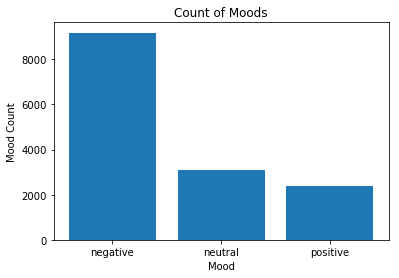

In [7]:
Index = [1,2,3]
plt.bar(Index,Mood_count)
plt.xticks(Index,['negative','neutral','positive'])
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

# Conclusion:
Most of the tweets are negative, so the data is kind of biased towards negative opinions, so it's expected that more accuracy will be observed when predicting negative tweets other than any other type.

In [8]:
Tweet['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

Note that we don't have an equal number of tweets fo all the airlines, most of them are close except for "Virgin America" that has the lowest number of tweets and "United" that has the biggest number of tweets.

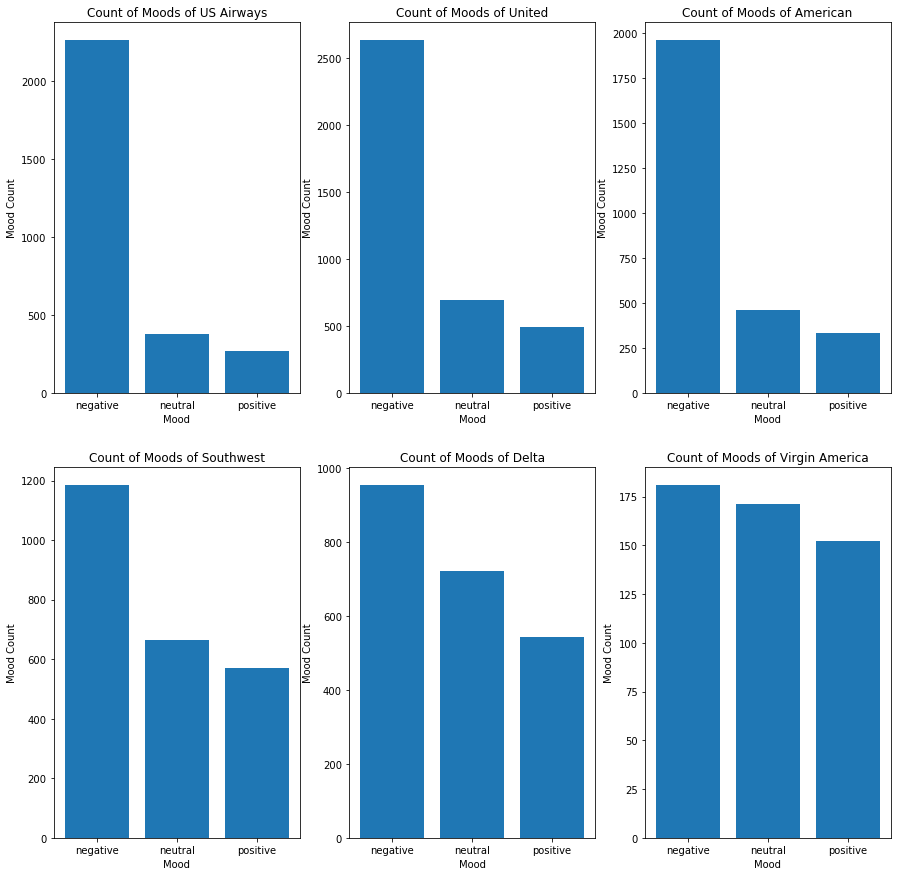

In [9]:
def plot_sub_sentiment(Airline):
    df=Tweet[Tweet['airline']==Airline]  # Only getting the sentiment for a specific airline
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+Airline)
plt.figure(1,figsize=(15, 15))
plt.subplot(231)  # dividing the plot to six subplots
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

From the above plots one can find that the distribution of moods for the first three airlines are biased toward negative moods. On contrary, the moods are distributed more balanced with the later three airline companies. 

# Second part:                   Negative Tweets Analysis                                      

In [10]:
NR_Counts=dict(Tweet['negativereason'].value_counts(sort=False))  # analyzing the negative reasons counts
NR_Counts

{'Bad Flight': 580,
 "Can't Tell": 1190,
 'Cancelled Flight': 847,
 'Customer Service Issue': 2910,
 'Damaged Luggage': 74,
 'Flight Attendant Complaints': 481,
 'Flight Booking Problems': 529,
 'Late Flight': 1665,
 'Lost Luggage': 724,
 'longlines': 178}

In [11]:
def NR_Count(Airline):
    if Airline=='All':  # take records of all airlines
        df=Tweet
    else:
        df=Tweet[Tweet['airline']==Airline]  # take records of only the mentioned airline
    count=dict(df['negativereason'].value_counts())  # get a dict for negative reasons with the number of each
    Unique_reason=list(Tweet['negativereason'].unique())  # removing repitions and getting the reasons
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']  # removing nulls
    Reason_frame=pandas.DataFrame({'Reasons':Unique_reason})  # changing the reasons to a data frame
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])  # adding the counts from the 'count' dict to the reason data frame
    return Reason_frame

In [12]:
def plot_reason(Airline):
    df=NR_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'], rotation=90)  # rotate the labels
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

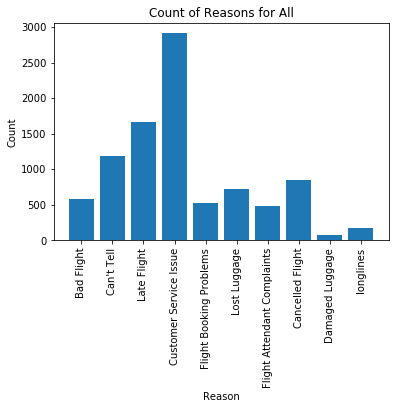

In [13]:
plot_reason('All')

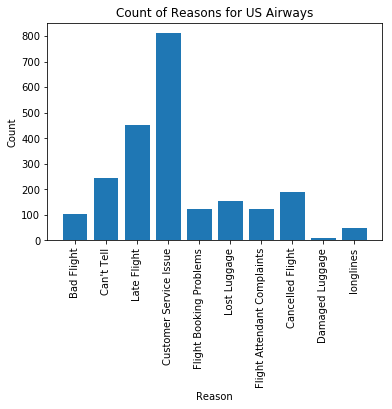

In [14]:
plot_reason('US Airways')

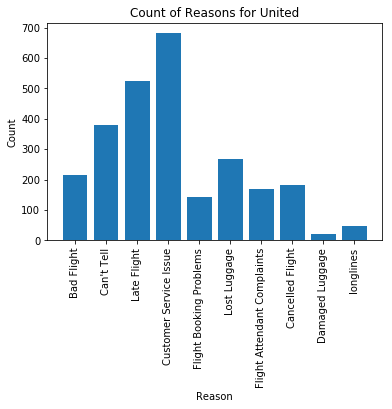

In [15]:
plot_reason('United')

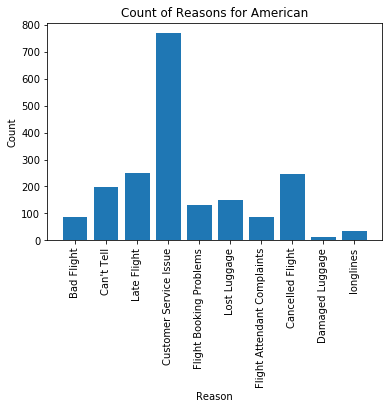

In [16]:
plot_reason('American')

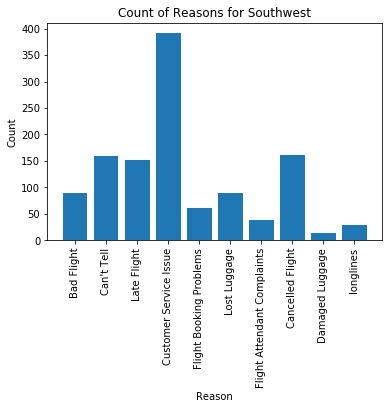

In [17]:
plot_reason('Southwest')

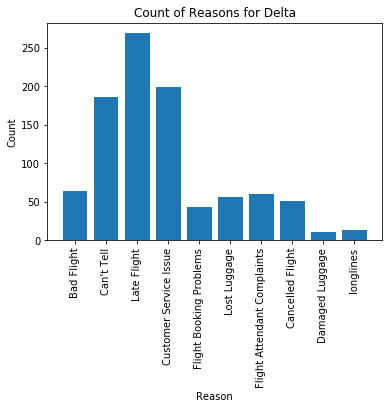

In [18]:
plot_reason('Delta')

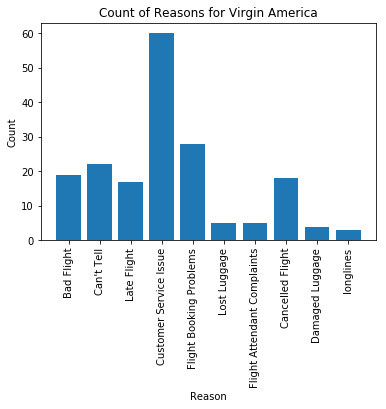

In [19]:
plot_reason('Virgin America')

We can Easily note that the main reason for negative tweet is "bad customer service" except for one airline "Delta" but overall customer service should be the main focus of all the airline companies

### Preprocessing data for classification

In [32]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')  # sometimes the import of stop words didn't work so I added this line to ensure it works

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Islam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)  # extract letters only
    words = letters_only.lower().split()  # splitting words by spaces and ignoring case senstivity                           
    stops = set(stopwords.words("english"))  # getting the un-needed stop words in English                
    meaningful_words = [w for w in words if not w in stops]  # removing the stop words from text
    return( " ".join( meaningful_words )) 

In [34]:
def clean_tweet_length(raw_tweet):  # return the number of meaningful words in each tweet
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

Adding a column 'sentiment' that maps the labels from negative, neutral and postive to 0,1 and 2 respectively

In [35]:
Tweet['sentiment']=Tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else (1 if x=='neutral' else 2))

In [36]:
Tweet['clean_tweet']=Tweet['text'].apply(lambda x: tweet_to_words(x))
Tweet['Tweet_length']=Tweet['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(Tweet,test_size=0.2,random_state=42)

In [37]:
train_clean_tweet=[]  # this list will hold the tweet words for training set
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]  # this list will hold the tweet words for testing set
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

I will try the count vector method to change the words into vectors of word frequency in the sentence during the classic machine learning approach, then I will try another method with the deep learning approach

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [39]:
v

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [40]:
train_features

<11712x11919 sparse matrix of type '<class 'numpy.int64'>'
	with 113748 stored elements in Compressed Sparse Row format>

In [41]:
test_features

<2928x11919 sparse matrix of type '<class 'numpy.int64'>'
	with 27301 stored elements in Compressed Sparse Row format>

# Classic Machine Learning Approaches

In [42]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [56]:
Classifiers = [
    SVC(kernel="rbf", C=0.035, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    GaussianNB()]

In [57]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is: '+str(accuracy))    

Accuracy of SVC is: 0.6451502732240437
Accuracy of DecisionTreeClassifier is: 0.6875
Accuracy of RandomForestClassifier is: 0.7691256830601093
Accuracy of GaussianNB is: 0.48941256830601093


Despite I tried many values and parameter tuning combinations for SVC, the accuracy of it didn't exceed 68% so I will take the random forests model Accuracy as a representitive of the machine learning approach.

## Compare the model performances

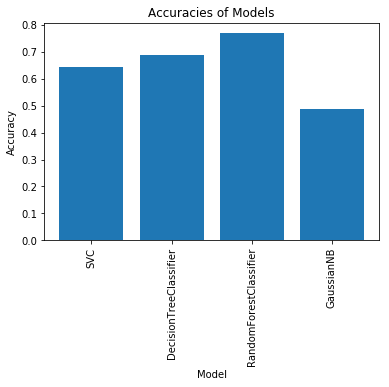

In [58]:
Index = [1,2,3,4]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

# Deep Learning Approach

Here I will try different approaches in everything, including data pre-processing to find a way to raise the accuarcy

In [60]:
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
C:\Users\Islam\Anaconda3\envs\dog-project\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [74]:
data = Tweet[['text','airline_sentiment']]  # selecting what we need from data


In [66]:
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
print(data[ data['airline_sentiment'] == 'positive'].size)
print(data[ data['airline_sentiment'] == 'negative'].size)
print(data[ data['airline_sentiment'] == 'neutral'].size)

C:\Users\Islam\Anaconda3\envs\dog-project\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Islam\Anaconda3\envs\dog-project\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


4726
18356
6198


Here I will try to use the tokenerizers instead of vector counts and see at the end if this change pays off or not

In [67]:
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

Choosing LSTM network as it is better when handling text as it understands contexts and has better history than RNNs.

In [70]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.5))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 32, 128)           256000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 128)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 591       
Total params: 511,391.0
Trainable params: 511,391.0
Non-trainable params: 0.0
_________________________________________________________________
None


In [71]:
Y = pd.get_dummies(data['airline_sentiment']).values  # one hot encoding for the output
Y

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

So the negative is the first index, neutral is the second and positive is the third

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(11712, 32) (11712, 3)
(2928, 32) (2928, 3)


Here I will get some validation data to use it later for early stopping to avoid over-fitting

In [95]:
batch_size = 512
earlystopper = keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0,patience=2,verbose=0, mode='auto')
checkpointer = keras.callbacks.ModelCheckpoint(filepath='bestmodel.hdf5', verbose=1, save_best_only=True) 
               

# Training the model
model.fit(X_train, Y_train, epochs=50, batch_size=batch_size, validation_split=0.1, verbose=1,callbacks=[earlystopper,checkpointer],shuffle=True)


Train on 10540 samples, validate on 1172 samples
Epoch 1/50
10540/10540 [==============================] - 29s - loss: 0.2503 - acc: 0.9017 - val_loss: 0.5254 - val_acc: 0.8029
Epoch 2/50
10540/10540 [==============================] - 31s - loss: 0.2389 - acc: 0.9077 - val_loss: 0.5465 - val_acc: 0.8063
Epoch 3/50
10540/10540 [==============================] - 32s - loss: 0.2314 - acc: 0.9101 - val_loss: 0.5485 - val_acc: 0.8038
Epoch 4/50
10540/10540 [==============================] - 34s - loss: 0.2251 - acc: 0.9118 - val_loss: 0.5748 - val_acc: 0.8020


It's obvious that after the second Epoch, overfitting started, so the Early stopping code was activated after two steps as instructed.

In [96]:
score=model.evaluate(X_test,Y_test,verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7095448075096464
Test accuracy: 0.7851775956284153


Here we can see that the accuracy is slightly better than the other classic machine learning models and the LSTM parameters are relatively not so large, the network was trained in around 5 epochs with 500K parameters which is good.

In [97]:
pos_cnt, neg_cnt, neu_cnt, pos_correct, neg_correct, neu_correct = 0, 0, 0, 0, 0,0
for x in range(len(X_test)):
    
    result = model.predict(X_test[x].reshape(1,X_test.shape[1])) # just inverting the shape of the matrix and getting predictions one by one
    
    if np.argmax(result) == np.argmax(Y_test[x]):
        if np.argmax(Y_test[x]) == 0:
            neg_correct += 1
        elif np.argmax(Y_test[x]) == 1:
            neu_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_test[x]) == 0:
        neg_cnt += 1
    elif np.argmax(Y_test[x]) == 1:
        neu_cnt += 1
    else:
        pos_cnt += 1



print("pos_acc = ", pos_correct/pos_cnt*100, "%")
print("neu_acc = ", neu_correct/neu_cnt*100, "%")
print("neg_acc = ", neg_correct/neg_cnt*100, "%")

pos_acc =  69.49891067538127 %
neu_acc =  61.89655172413793 %
neg_acc =  85.81259925886712 %


This shows us that when inspecting the accuracy of prediciting each class, the accuracy of identifying negative twwet
is the highest since it has more training examples both the positive and neutral tweets. Then comes the postive tweets despite it has less number of training examples than neutral tweets but there are certain words that can lead us to better prediction of positive feedbacks, while the last accuracy is for identifying neutral tweets because we don't have enough training data for it and it's very general.